# An analysis of neighborhoods in Hamburg for couples with children


## Table of Contents
1. Introduction
2. Data
3. Methodology
4. Analysis
5. Results and discussion
6. Conclusion and outlook


## 1. Introduction
<div style="text-align: justify"> 
Hamburg is a beautiful and modern city. According to Numbeo, Hamburg is the top 20 out of 87 cities in Europa ranked by high Quality of Life Index (https://www.numbeo.com/quality-of-life/in/Hamburg). The city of Hamburg is divided into seven boroughs with 104 neighborhoods. Each of the neighborhoods has its own specific characters. Whether you are a worker moving from outside of the city, or a student who wants to rent a flat close to his college at an economical price or if you are a new parent and want to move to a quiet place that offers plenty of activities for your kids, finding a neighborhood that meets the personal requirements the most will be challenging. This project aims to give you an overview of the neighborhoods in Hamburg that could fit your personal requirements by clustering the neighborhoods into several groups based on the feathers (rental price, the most common venue categories, etc.) of each neighborhood. 
</div>
<br/><br/>
<div style="text-align: justify"> 
More specifically, in this project, I'm trying to find a neighborhood in Hamburg for my friend Betty, who is going to give birth to twin babies at the end of 2021. Betty is currently living in the neighborhood of Eimsbüttel with her partner and a 4-year-old daughter. Because of the coming of the twins, she needs to find a bigger apartment for 2 adults with 3 children. She actually quite enjoys her current living area. Every morning, after she sends her daughter to the kindergarten, she grabs a coffee and then sits on the beach in the park along the Alster River near her living area. There is also a big playground nearby. In the afternoon, after she picks up the daughter, she goes to the playground. Usually, there are some other couples with children in the playground too, so she can easily have chats with them. She also enjoys the convenience of shopping because the current living area has several supermarkets and grocery stores. When she is busy and don’t have time to cook, she can easily get food from the restaurants downstairs of her apartment. However, there is also something she does not like about her current living area. For example, there are usually many people walking, running, cycling in the park nearby, which makes it a little bit too crowed in the park. It is also crowed in the restaurants too. She usually needs to wait quite long time to get the food she ordered. She would like to have an apartment in a quieter neighborhood. Besides, she doesn’t like driving. So, it will be great if the new living area has convenient public transpirations.
</div>

After talking with her, I summarized her key requirements for a neighborhood with the following characters:
* Less people
* Playground
* Park
* Supermarket
* Bus stops or U ban stations
* Restaurants
* Coffee shops

I further discussed with her about how important of the above characters and we reached to the agreements about the importance of each character:
* Playground, **important ratio=0.25**;
* Nature, including parks, rivers, etc., **important ratio: 0.25**;
* Supermarkets, stores to buy groceries, etc., **important ratio: 0.15**;
* Public transportation, including bus stops, U ban, S ban, train stations, etc., **important ratio: 0.15**;
* Food, including restaurants, fast food shops, etc., **important ratio: 0.1**;
* Coffee shops, **important ratio: 0.1**;

Other considerations:
* **Less population density** than the current neighborhood;
* Other couples with children, so she can have chats with the other parents;
* **Lower rental price** is better;

<div style="text-align: justify"> 
Overall, Betty would like to keep the things she likes about the current neighborhood (playground, parks/rivers nearby, restaurants and coffee shops, easy public transportation, parents with children that she can talk with) and avoid the things she dislikes (too many people). I will help her to identify the most promising neighborhoods based on her above wishes.
</div>

## 2. Data 

### 2.1 Information needed
After identifying Betty’s wishes for the new neighborhood, I decide to collect the following information:
* Information of the neighborhoods in Hamburg, including names etc.;
* Population density of each neighborhood;
* Percentage of families with children living in each neighborhood;
* Rental price of each neighborhood;
* Venues in each neighborhood;

### 2.2 Data source
To get the needed information, the following datasets are collected through internet:
* Information about each neighborhood, including names and coordinates, population density.  
https://de.zxc.wiki/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs
<br/><br/>
* Percentage of families with children in each neighborhood **(31.12.2020)**. 
This information is downloaded from:
https://www.govdata.de/web/guest/suchen/-/details/statistisches-jahrbuch-hamburg-2020-2021
<br/><br/>
* Rental price of each neighborhood **(06/2021)**. 
This information is downloaded from:
https://www.wohnungsboerse.net/mietspiegel-Hamburg/3195 
<br/><br/>
* Information about the venues in each neighborhood **(06/2021)**. 
This information is gathered through **Foursquare API**, using which to get the most common venue categories in each neighborhood.

## 3. Methodology
* **Collect and clean the data**. 
I will first start to collect all the needed information, clean the dataset, dealing with missing values, etc..  <br/><br/>
* **Explore the data**.
After I get the cleaned data, I will do an exploratory data analysis. From describe analysis, I can get valuable insights for the distributions of the important features, like ‘population density’, ’rental price’ and ‘percentage of families with children’ living in each neighborhood.
<br/><br/>
* **Set criterion to filter out the unwanted neighborhoods**. 
Betty really does not like the crowed neighborhoods and she would like to live in a neighborhood with many couples with children. Based on these two wished, I first filter out the neighborhoods with high density of population and less percentage of families with children. 
<br/><br/>
* **Visualize the neighborhoods that she might be interested**. 
Folium map is used to visualize the distribution of the neighborhoods that she might be interested (green) and not interested (gray). This will give her a first impression about the locations that might fit her wishes.
<br/><br/>
* **Get the venue categories in each neighborhood**. 
Foursquare API is used to get the most common venue categories in each neighborhood. One hot encoding is used to put all the venue categories of each neighborhood into one data frame. Then, I will summarize the venues into the categories Betty wishes to have (see the list in the introduction part).
<br/><br/>
* **Get interested index**.
Based on her wishes, the interested index for each neighborhood is calculated based on the importance of the features.
**Interested index = Playground * 0.25 + Nature * 0.25 + Stores * 0.15 + transportation * 0.15 + Food * 0.1 + Coffee * 0.1**
<br/><br/>
* **Cluster the neighborhoods**.
k means is used to cluster the neighborhoods into 5 groups. The features I will use are ‘Interested index’, ‘rental price’, ‘percentage of families with children’ of each neighborhood. 
Folium map is then used to visualize the locations of the 6 clustered groups. This will allow Betty to have an overview about the 6 clusters.
<br/><br/>
* **Check each cluster and pick up the one fits Betty's wishes most**. 
Based on the principle of lower ‘rental price’, higher ‘percentage of families with children’ and higher ‘interested index’, I will pick up the cluster that fits the wishes of Betty most. Folium map is then used to visualize the neighborhoods that fits her wished most to give her an impression about the locations of these neighborhoods. 

## 4. Analysis

### 4.1 Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy import geocoders

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
import matplotlib.pyplot as plt
import requests
print('Libraries imported.')

Libraries imported.


### 4.2 Import data
#### 4.2.1 Get the rental price of each neighborhoods

In [2]:
file_path='D:\\DataScience\\Certificate-IBM data science2021.05.21\\Couse10-Capstone\\CapstoneProject\\Data\\RentBuy\\BuyRentPrice.xlsx'
sheet='BuyRentAppartment'
df_BuyRentAppartment=pd.read_excel(file_path,skiprows=0,sheet_name=sheet)
df_BuyRentAppartment.rename(columns={'Unnamed: 0':'Neighborhood','Unnamed: 1':'BuyAppartmentPrice','Unnamed: 2':'RentAppartmentPrice'},inplace=True)
df_BuyRentAppartment.drop(columns=['BuyAppartmentPrice'], axis=1, inplace=True)
df_BuyRentAppartment.head()

,Neighborhood,RentAppartmentPrice
0,Kirchwerder,10.52
1,Langenbek,10.54
2,Wilstorf,10.63
3,Steilshoop,11.10
4,Heimfeld,11.11


#### 4.2.2 Get the percentage of the couples with children of each neighborhoods

In [3]:
file_path='D:\\DataScience\\Certificate-IBM data science2021.05.21\\Couse10-Capstone\\CapstoneProject\\Data\\Summary.xlsx'
sheet='Households'
df_Households=pd.read_excel(file_path,skiprows=4,sheet_name=sheet)
df_Households.rename(columns={'Unnamed: 0':'Neighborhood', 'Anzahl':'Household_Number','Unnamed: 2':'Household_PeopleIn','in %':'Single_Percent','in %.1':'FamilyWithChild_Percent','in % ':'SingleParentWithChild_Percent'}, inplace=True)
df_Households.drop(['Anzahl.1','Anzahl.2','Anzahl.3'],axis=1,inplace=True)
df_Households['FamilyWithChild_Percent']=df_Households['FamilyWithChild_Percent']/100
SelectColumns=['Neighborhood','FamilyWithChild_Percent']
df_FamilyWithChild=df_Households[SelectColumns]
df_FamilyWithChild.head()

,Neighborhood,FamilyWithChild_Percent
0,Hamburg-Altstadt,0.121
1,HafenCity,0.263
2,Neustadt,0.114
3,St. Pauli,0.128
4,St. Georg,0.105


#### 4.2.3 Get the information of the neighborhoods in Hamburg
I use pandas to get the **Coordinates** and **population density** information of each neighborhood.
For consistency, I manually rename some of the neigborhoods.  

In [4]:
url='https://de.zxc.wiki/wiki/Liste_der_Bezirke_und_Stadtteile_Hamburgs'
tbs=pd.read_html(url)

df_neighborhood_coordinates=tbs[1]
df_neighborhood_coordinates.rename(columns={'district':'Neighborhood','district.1':'Borough','Population density (inhabitants / km²)':'PopulationDensity'}, inplace=True)
df_neighborhood_coordinates.drop('Residents',axis=1,inplace=True)
df_neighborhood_coordinates.dropna(axis=1,inplace=True)

## correct the name of the neighborhood
df_neighborhood_coordinates.at[0,'Neighborhood']='Hamburg-Altstadt'
df_neighborhood_coordinates.at[8,'Neighborhood']='Horn'
df_neighborhood_coordinates.at[4,'Neighborhood']='St. Georg'
df_neighborhood_coordinates.at[19,'Neighborhood']='Altona-Altstadt'
df_neighborhood_coordinates.at[21,'Neighborhood']='Altona-Nord'
df_neighborhood_coordinates.at[44,'Neighborhood']='Groß Borstel'
df_neighborhood_coordinates.at[51,'Neighborhood']='Barmbek-Nord'
df_neighborhood_coordinates.at[49,'Neighborhood']='Barmbek-Süd'
df_neighborhood_coordinates.at[99,'Neighborhood']='Hausbruch'
df_neighborhood_coordinates.at[54,'Neighborhood']='Langenhorn'
df_neighborhood_coordinates.at[73,'Neighborhood']='Lohbrügge'
df_neighborhood_coordinates.at[94,'Neighborhood']='Marmstorf'
df_neighborhood_coordinates.at[32,'Neighborhood']='Rissen'
df_neighborhood_coordinates.at[62,'Neighborhood']='Steilshoop'
df_neighborhood_coordinates.at[81,'Neighborhood']='Allermöhe'
print(df_neighborhood_coordinates.shape)
df_neighborhood_coordinates.head()

(104, 4)


,Neighborhood,Borough,PopulationDensity,Coordinates
0,Hamburg-Altstadt,Hamburg-center,979,"53 ° 33 ′ 0 ″ N, 10 ° 0 ′ 0 ″ E"
1,HafenCity,Hamburg-center,2239,"53 ° 32 ′ 28 ""N, 10 ° 0 ′ 1"" E"
2,Neustadt,Hamburg-center,5549,"53 ° 33 ′ 7 ″ N, 9 ° 59 ′ 8 ″ E"
3,St. Pauli,Hamburg-center,8839,"53 ° 33 '25 ""N, 9 ° 57' 50"" E"
4,St. Georg,Hamburg-center,4733,"53 ° 33 ′ 18 ""N, 10 ° 0 ′ 44"" E"


Define a function to get the geographical coordinates of each neighborhood. 

In [5]:
import re

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'E' or direction == 'S':
        dd *= -1
    return dd;

def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]

def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])
 
    return (lat)

In [6]:
df_neighborhood_coordinates[['Latitude','Longitude']] = df_neighborhood_coordinates.Coordinates.str.split(", ",expand=True,)
df_neighborhood_coordinates.Latitude=df_neighborhood_coordinates.Latitude.apply(parse_dms)
df_neighborhood_coordinates.Longitude=(-1)*df_neighborhood_coordinates.Longitude.apply(parse_dms)
df_neighborhood_coordinates.drop(['Coordinates'], axis=1,inplace=True)
df_neighborhood_coordinates.head()

,Neighborhood,Borough,PopulationDensity,Latitude,Longitude
0,Hamburg-Altstadt,Hamburg-center,979,53.550000,10.000000
1,HafenCity,Hamburg-center,2239,53.541111,10.000278
2,Neustadt,Hamburg-center,5549,53.551944,9.985556
3,St. Pauli,Hamburg-center,8839,53.556944,9.963889
4,St. Georg,Hamburg-center,4733,53.555000,10.012222


Merge the information into one data frame. 

In [7]:
Df=pd.merge(df_BuyRentAppartment,df_FamilyWithChild, on='Neighborhood',how='left')
Df=pd.merge(Df,df_neighborhood_coordinates, on='Neighborhood',how='left')
Df.dropna(axis=0,inplace=True)
Df.head()

,Neighborhood,RentAppartmentPrice,FamilyWithChild_Percent,Borough,PopulationDensity,Latitude,Longitude
0,Kirchwerder,10.52,0.233,Bergedorf,313,53.419722,10.201667
1,Langenbek,10.54,0.197,Harburg,5048,53.437222,9.986111
2,Wilstorf,10.63,0.195,Harburg,5194,53.443611,9.984167
3,Steilshoop,11.10,0.223,Wandsbek,7976,53.610278,10.059167
4,Heimfeld,11.11,0.182,Harburg,1725,53.463889,9.956111


Correct the data type of the columns

In [8]:
print('Before correction: \n',Df.dtypes)
Df.PopulationDensity=Df.PopulationDensity.astype('float64')
print('------------------')
print('After correction: \n',Df.dtypes)

Before correction: 
 Neighborhood                object
RentAppartmentPrice        float64
FamilyWithChild_Percent    float64
Borough                     object
PopulationDensity           object
Latitude                   float64
Longitude                  float64
dtype: object
------------------
After correction: 
 Neighborhood                object
RentAppartmentPrice        float64
FamilyWithChild_Percent    float64
Borough                     object
PopulationDensity          float64
Latitude                   float64
Longitude                  float64
dtype: object


### 4.3 Data exploration
#### 4.3.1 Population density

Betty lives in a really crowed neighorhood with a population density (km^2):  17577.0


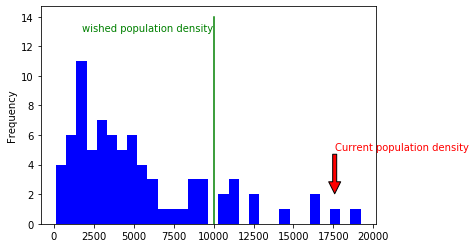

In [9]:
ax=Df.PopulationDensity.plot.hist(bins=30,color='blue')
ax.annotate('Current population density',color='red', xy=(17577, 2), xytext=(17577, 5),
            arrowprops=dict(facecolor='red', shrink=0.01))
plt.plot([10000,10000], [0,14], 'g-')
ax.text(1800, 13, 'wished population density',color='green')

PopulationDensity_Eims=Df[Df.Neighborhood=='Eimsbüttel']['PopulationDensity']
print('Betty lives in a really crowed neighorhood with a population density (km^2): ', PopulationDensity_Eims.values[0])

#### 4.3.2 Population density

Betty pays cheaper rental price than the average in Eimsbüttel: 14.2 vs. 16.3
This is becasue she has lived in the current appartment for about 12 years.


Text(15.7, 8, 'wished rental price')

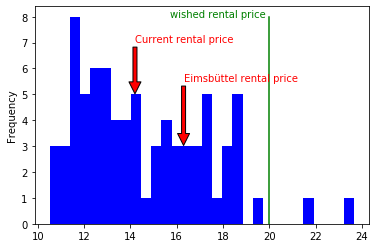

In [10]:
RentalPrice_Eims=Df[Df.Neighborhood=='Eimsbüttel']['RentAppartmentPrice']
print('Betty pays cheaper rental price than the average in Eimsbüttel: 14.2 vs.', RentalPrice_Eims.values[0])
print('This is becasue she has lived in the current appartment for about 12 years.')

ax=Df.RentAppartmentPrice.plot.hist(bins=30,color='blue')
ax.annotate('Current rental price',color='red', xy=(14.2, 5), xytext=(14.2, 7),
            arrowprops=dict(facecolor='red', shrink=0.01))

ax.annotate('Eimsbüttel rental price',color='red', xy=(16.3, 3), xytext=(16.3, 5.5),
            arrowprops=dict(facecolor='red', shrink=0.01))

plt.plot([20,20], [0,8], 'g-')
ax.text(15.7, 8, 'wished rental price',color='green')

#### 4.3.3 Percentage of family with child

The percentage of familes with children in the Eimsbüttel:  0.13


Text(0.175, 8, 'wished percentage of family with children')

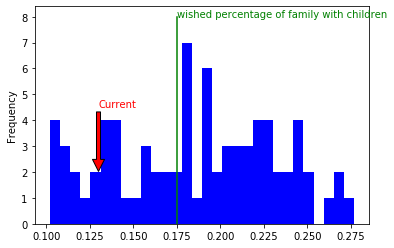

In [11]:
FamilyWithChild_Percent_Eims=Df[Df.Neighborhood=='Eimsbüttel']['FamilyWithChild_Percent']
print('The percentage of familes with children in the Eimsbüttel: ', FamilyWithChild_Percent_Eims.values[0])

ax=Df.FamilyWithChild_Percent.plot.hist(bins=30,color='blue')
ax.annotate('Current',color='red', xy=(0.13, 2), xytext=(0.13, 4.5),
            arrowprops=dict(facecolor='red', shrink=0.01))

plt.plot([0.175,0.175], [0,8], 'g-')
ax.text(0.175, 8, 'wished percentage of family with children',color='green')

### 4.4 Filter out the unwanted neighborhoods

In [12]:
Df_interested=Df[(Df['PopulationDensity']<10000) & (Df.FamilyWithChild_Percent>0.175) & (Df.RentAppartmentPrice<20)]
Df_interested.shape

(46, 7)

### 4.5 Create a map of Hamburg with neighborhoods superimposed on top.
#### 4.5.1 Get the latitude and longitude values of Hamburg.
Use **geopy** library. In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>.

In [13]:
address = 'Hamburg, HH'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hamburg are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hamburg are 53.550341, 10.000654.


#### 4.5.2 Create a map of Hamburg with neighborhoods superimposed on top.
**Folium** is a great visualization library.

In [14]:
# create map of Hamburg using latitude and longitude values
map_Hamburg = folium.Map(location=[latitude, longitude], zoom_start=10)

# add interested markers to map
for lat, lng, borough, neighborhood in zip(Df_interested['Latitude'], Df_interested['Longitude'], Df_interested['Borough'], Df_interested['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='green',
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_Hamburg)
    
## plot the unwanted neighborhoods in the map in a marker with gray color
Df_filterOut=Df[~Df.Neighborhood.isin(Df_interested.Neighborhood)]

# add markers to map
for lat, lng, borough, neighborhood in zip(Df_filterOut['Latitude'], Df_filterOut['Longitude'], Df_filterOut['Borough'], Df_filterOut['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='gray',
        fill=True,       
        fill_opacity=0.7,
        parse_html=False).add_to(map_Hamburg)

## add the current living neighborhood
lat=Df[Df.Neighborhood=='Eimsbüttel']['Latitude'].values[0]
print(lat)
lng=Df[Df.Neighborhood=='Eimsbüttel']['Longitude'].values[0]

folium.Marker( location=[lat, lng],
              popup="Current Appartment",
              icon=folium.Icon(color="red", icon="info-sign"),
             ).add_to(map_Hamburg)

map_Hamburg

53.575833333333335


### 4.6 Utilizing the Foursquare API to explore the neighborhoods and segment them
#### 4.6.1 Define Foursquare Credentials and Version

In [38]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20210605'

#### 4.6.2 Extract venues 
#### Let's create a function to get venues in all the neighborhoods in dataframe

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Get the top 100 venues in each neighborhood.

In [18]:
LIMIT=100
# type your answer here
venues = getNearbyVenues(names=Df_interested['Neighborhood'],
                                latitudes=Df_interested['Latitude'],
                                longitudes=Df_interested['Longitude']
                         )

<a id='item3'></a>


In [19]:
#### Let's check the size of the resulting dataframe
print(venues.shape)
venues.head()

(746, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Langenbek,53.437222,9.986111,Lidl,53.442411,9.993219,Supermarket
1,Langenbek,53.437222,9.986111,Bäckerei Weiss,53.438949,9.987133,Bakery
2,Langenbek,53.437222,9.986111,H Freudenthalweg,53.439816,9.988239,Bus Stop
3,Langenbek,53.437222,9.986111,Sky,53.432509,9.986515,Shopping Mall
4,Langenbek,53.437222,9.986111,H Buchholzer Weg,53.431969,9.983450,Bus Stop


In [54]:
#### Let's check how many venues were returned for each neighborhood
venues.groupby('Neighborhood').count()['Venue']

Neighborhood
Allermöhe                6
Alsterdorf              41
Bergedorf               41
Billstedt               17
Blankenese              53
Duvenstedt              14
Eidelstedt              18
Eißendorf               12
Farmsen-Berne           21
Groß Borstel            11
Groß Flottbek           22
Hausbruch                9
Heimfeld                17
Hummelsbüttel           16
Iserbrook                8
Jenfeld                 10
Langenbek                9
Langenhorn              13
Lemsahl-Mellingstedt     5
Lohbrügge                4
Lokstedt                23
Lurup                   17
Marienthal              22
Marmstorf                6
Neuenfelde               5
Neugraben-Fischbek       2
Niendorf                15
Nienstedten             13
Ohlsdorf                37
Osdorf                  16
Othmarschen             24
Poppenbüttel            36
Rahlstedt               23
Rissen                  13
Rothenburgsort          12
Sasel                   13
Schnelsen      

In [20]:
#### Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 152 uniques categories.


#### 4.6.3 Analyze Each Neighborhood

In [21]:
# one hot encoding
df_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Wine Shop,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bavarian Restaurant,Beach,Beer Garden,Big Box Store,Bistro,Bookstore,Bowling Alley,Bridge,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Canal,Chinese Restaurant,Climbing Gym,Clothing Store,Coffee Shop,College Arts Building,College Cafeteria,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Dessert Shop,Diner,Doner Restaurant,Drugstore,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Flower Shop,Food,Food Court,Football Stadium,Forest,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Garden Center,Gas Station,Gastropub,German Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,History Museum,Hockey Field,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Insurance Office,Intersection,Italian Restaurant,Lake,Lawyer,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Medical Supply Store,Mediterranean Restaurant,Metro Station,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Multiplex,Nature Preserve,Neighborhood,Office,Optical Shop,Organic Grocery,Outdoor Sculpture,Palace,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Restaurant,Salad Place,Sandwich Place,Schnitzel Restaurant,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Track,Trail,Train Station,Trattoria/Osteria,Vietnamese Restaurant,Water Park,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Langenbek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Langenbek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Langenbek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Langenbek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Langenbek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.


In [22]:
df_onehot.shape

(746, 152)

#### Next, let's group rows by neighborhood and by taking the sum of the frequency of occurrence of each category


In [23]:
df_grouped = df_onehot.groupby('Neighborhood').sum().reset_index()
print(df_grouped.shape)
df_grouped.head()

(45, 152)


,Neighborhood,Wine Shop,American Restaurant,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bavarian Restaurant,Beach,Beer Garden,Big Box Store,Bistro,Bookstore,Bowling Alley,Bridge,Building,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Canal,Chinese Restaurant,Climbing Gym,Clothing Store,Coffee Shop,College Arts Building,College Cafeteria,Construction & Landscaping,Convenience Store,Cosmetics Shop,Dance Studio,Dessert Shop,Diner,Doner Restaurant,Drugstore,Eastern European Restaurant,Electronics Store,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Flower Shop,Food,Food Court,Football Stadium,Forest,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Garden Center,Gas Station,Gastropub,German Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,History Museum,Hockey Field,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Insurance Office,Intersection,Italian Restaurant,Lake,Lawyer,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Medical Supply Store,Mediterranean Restaurant,Metro Station,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Multiplex,Nature Preserve,Office,Optical Shop,Organic Grocery,Outdoor Sculpture,Palace,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Photography Studio,Pier,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Racetrack,Restaurant,Salad Place,Sandwich Place,Schnitzel Restaurant,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Track,Trail,Train Station,Trattoria/Osteria,Vietnamese Restaurant,Water Park,Wine Bar
0,Allermöhe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alsterdorf,0,0,2,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,5,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Bergedorf,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,1,0,1,0,1,0,0,0,3,1,0,0,0,1,0,0,0,0,0,3,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,1,2,0,0,0
3,Billstedt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Blankenese,0,0,0,0,0,0,0,0,0,1,2,1,0,0,1,2,0,0,0,0,0,0,0,1,0,1,0,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,2,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,1,0,1,0,0,1,0,3,0,0,0,3,0,0,0,0,0,0,2,0,0,0,0,0,0,1,3,0,0,1,0,2,0,0,0,1,0,1,0,0,0


#### Let's print each neighborhood along with the top 5 most common venues


In [24]:
num_top_venues = 6

for hood in df_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = df_grouped[df_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allermöhe----
                venue  freq
0    Indoor Play Area   1.0
1  Light Rail Station   1.0
2         Supermarket   1.0
3      Farmers Market   1.0
4        Soccer Field   1.0
5           Drugstore   1.0


----Alsterdorf----
            venue  freq
0        Bus Stop   5.0
1     Supermarket   4.0
2           Hotel   3.0
3      Restaurant   3.0
4       Drugstore   2.0
5  Ice Cream Shop   2.0


----Bergedorf----
                  venue  freq
0             Drugstore   3.0
1        Clothing Store   3.0
2  Fast Food Restaurant   2.0
3         Big Box Store   2.0
4           Supermarket   2.0
5     Trattoria/Osteria   2.0


----Billstedt----
                      venue  freq
0            Clothing Store   4.0
1      Fast Food Restaurant   3.0
2  Mediterranean Restaurant   1.0
3            Sandwich Place   1.0
4                 Drugstore   1.0
5         German Restaurant   1.0


----Blankenese----
                venue  freq
0                Café   7.0
1         Supermarket   3.0
2   

5             Automotive Shop   1.0


----Volksdorf----
               venue  freq
0      Garden Center   1.0
1   Greek Restaurant   1.0
2        Flower Shop   1.0
3        Gas Station   1.0
4  German Restaurant   1.0
5        Supermarket   1.0


----Wellingsbüttel----
                venue  freq
0         Supermarket   4.0
1                Café   2.0
2  Light Rail Station   2.0
3  Italian Restaurant   1.0
4              Bakery   1.0
5         Gas Station   1.0


----Wilhelmsburg----
               venue  freq
0        Supermarket   2.0
1               Park   2.0
2  German Restaurant   2.0
3             Bakery   1.0
4          Pet Store   1.0
5       Climbing Gym   1.0


----Wilstorf----
               venue  freq
0           Bus Stop   4.0
1        Supermarket   4.0
2  German Restaurant   2.0
3             Bakery   1.0
4   Business Service   1.0
5        Bus Station   1.0


----Wohldorf-Ohlstedt----
               venue  freq
0  German Restaurant   2.0
1        IT Services   1.0
2    

#### Let's write a function to sort the venues in descending order.

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 6

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Allermöhe,Indoor Play Area,Drugstore,Supermarket,Soccer Field,Light Rail Station,Farmers Market
1,Alsterdorf,Bus Stop,Supermarket,Restaurant,Hotel,Drugstore,Ice Cream Shop
2,Bergedorf,Drugstore,Clothing Store,Trattoria/Osteria,Supermarket,Fast Food Restaurant,Big Box Store
3,Billstedt,Clothing Store,Fast Food Restaurant,Sandwich Place,Supermarket,Mediterranean Restaurant,Drugstore
4,Blankenese,Café,Restaurant,Seafood Restaurant,Supermarket,Beach,Harbor / Marina


#### 4.6.4 Put all information into one data frame
#### Let's have a look at the venue categories in the neighborhoods

In [27]:
for venue in df_grouped.columns:
    print(venue)

Neighborhood
Wine Shop
American Restaurant
Asian Restaurant
Athletics & Sports
Auto Dealership
Auto Workshop
Automotive Shop
BBQ Joint
Baby Store
Bakery
Bank
Bar
Baseball Field
Basketball Court
Bavarian Restaurant
Beach
Beer Garden
Big Box Store
Bistro
Bookstore
Bowling Alley
Bridge
Building
Burger Joint
Bus Station
Bus Stop
Business Service
Café
Canal
Chinese Restaurant
Climbing Gym
Clothing Store
Coffee Shop
College Arts Building
College Cafeteria
Construction & Landscaping
Convenience Store
Cosmetics Shop
Dance Studio
Dessert Shop
Diner
Doner Restaurant
Drugstore
Eastern European Restaurant
Electronics Store
Fabric Shop
Falafel Restaurant
Farmers Market
Fast Food Restaurant
Film Studio
Fish Market
Flea Market
Flower Shop
Food
Food Court
Football Stadium
Forest
French Restaurant
Fruit & Vegetable Store
Furniture / Home Store
Garden Center
Gas Station
Gastropub
German Restaurant
Golf Course
Greek Restaurant
Grocery Store
Gym
Gym / Fitness Center
Gym Pool
Harbor / Marina
Hardware Store

#### Let's combine the venues into 6 categries that Betty would like to have. 

In [28]:
df=pd.DataFrame(columns=['Neighborhood','PlayGround','Nature','Supermarket','Transportation','Food','Coffee'])
df['Neighborhood']=df_grouped['Neighborhood']
df['PlayGround']=df_grouped[['Playground','Indoor Play Area']].sum(axis=1)*0.25
df['Nature']=df_grouped[['Water Park','Park','Lake','Beach','Forest']].sum(axis=1)*0.25
df['Supermarket']=df_grouped[['Farmers Market','Supermarket','Grocery Store','Organic Grocery','Fruit & Vegetable Store']].sum(axis=1)*0.15
df['Transportation']=df_grouped[['Metro Station','Train Station','Bus Stop','Bus Station','Light Rail Station']].sum(axis=1)*0.15

index_co=list(np.where((df_grouped.columns.str.find('Restaurant')>0)==True))[0]
df['Food']=df_grouped.iloc[:,index_co].sum(axis=1)
df['Food']=df['Food']+df_grouped[[ 'Burger Joint', 'Diner', 'Pizza Place','Food','Sandwich Place','Snack Place','Steakhouse','Salad Place']].sum(axis=1)*0.10

df['Coffee']=df_grouped[['Café','Coffee Shop','College Cafeteria']].sum(axis=1)*0.1

df_grouped=df.copy()

In [29]:
df_grouped=pd.DataFrame(columns=['Neighborhood','Sum_interest'])
df_grouped['Sum_interest']=df[['PlayGround','Nature','Supermarket','Transportation','Food','Coffee']].sum(axis=1)
df_grouped['Neighborhood']=df['Neighborhood']
df_grouped

,Neighborhood,Sum_interest
0,Allermöhe,0.70
1,Alsterdorf,6.90
2,Bergedorf,5.45
3,Billstedt,6.40
4,Blankenese,11.80
5,Duvenstedt,1.60
6,Eidelstedt,2.10
7,Eißendorf,3.60
8,Farmsen-Berne,4.85
9,Groß Borstel,0.70


#### Let's create the new dataframe with the features :
* RentAppartmentPrice
* FamilyWithChild_Percent
* Sum_interest

In [30]:
SelectColumns=['Neighborhood','RentAppartmentPrice', 'FamilyWithChild_Percent']
df_clustering=pd.DataFrame()
df_clustering[SelectColumns]=Df[SelectColumns]
df=pd.merge(df_clustering,df_grouped, on='Neighborhood', how='right' )
print(df.shape)
df.head()

(45, 4)


,Neighborhood,RentAppartmentPrice,FamilyWithChild_Percent,Sum_interest
0,Langenbek,10.54,0.197,1.90
1,Wilstorf,10.63,0.195,3.85
2,Steilshoop,11.10,0.223,2.70
3,Heimfeld,11.11,0.182,3.05
4,Eißendorf,11.39,0.193,3.60


#### 4.6.5 Cluster Neighborhoods
Run _k_-means to cluster the neighborhood into 5 clusters.

In [31]:
from sklearn.preprocessing import StandardScaler 
# set number of clusters
kclusters =6

df_grouped_clustering =df.drop('Neighborhood', 1)
df_grouped_clustering = StandardScaler().fit_transform(df_grouped_clustering)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# add clustering labels
df.insert(0, 'Cluster Labels', kmeans.labels_)

#### Add in the dataframe of the coordinate of each neighborhood.

In [32]:
df_merged=pd.merge(df,Df_interested, on=['Neighborhood','RentAppartmentPrice','FamilyWithChild_Percent'])
df_merged

,Cluster Labels,Neighborhood,RentAppartmentPrice,FamilyWithChild_Percent,Sum_interest,Borough,PopulationDensity,Latitude,Longitude
0,1,Langenbek,10.54,0.197,1.90,Harburg,5048.0,53.437222,9.986111
1,1,Wilstorf,10.63,0.195,3.85,Harburg,5194.0,53.443611,9.984167
2,2,Steilshoop,11.10,0.223,2.70,Wandsbek,7976.0,53.610278,10.059167
3,1,Heimfeld,11.11,0.182,3.05,Harburg,1725.0,53.463889,9.956111
4,1,Eißendorf,11.39,0.193,3.60,Harburg,3012.0,53.455833,9.954444
5,1,Marmstorf,11.47,0.192,0.30,Harburg,1545.0,53.435833,9.968611
6,2,Neuenfelde,11.69,0.244,0.30,Harburg,316.0,53.514722,9.795556
7,1,Lohbrügge,11.70,0.185,1.45,Bergedorf,3078.0,53.509444,10.182222
8,1,Allermöhe,11.71,0.181,0.70,Bergedorf,160.0,53.486111,10.154167
9,2,Neugraben-Fischbek,11.83,0.251,0.15,Harburg,1404.0,53.483333,9.850000


#### Finally, let's visualize the resulting clusters

In [33]:
df_merged['Cluster Labels']=df_merged['Cluster Labels'].astype('int')
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighborhood'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>


#### 4.7 Examine Clusters


#### Cluster 1


In [34]:
df_merged.loc[df_merged['Cluster Labels'] ==0, df_merged.columns[[1] + list(range(2, 9))]]

,Neighborhood,RentAppartmentPrice,FamilyWithChild_Percent,Sum_interest,Borough,PopulationDensity,Latitude,Longitude
10,Ohlsdorf,11.83,0.181,7.80,Hamburg North,2315.0,53.625833,10.031389
11,Bergedorf,11.95,0.197,5.45,Bergedorf,3475.0,53.488056,10.212500
14,Billstedt,12.19,0.222,6.40,Hamburg-center,4142.0,53.540556,10.101111
17,Rahlstedt,12.51,0.206,5.80,Wandsbek,3462.0,53.601944,10.156667
22,Poppenbüttel,12.76,0.210,8.65,Wandsbek,2951.0,53.659167,10.084722
31,Farmsen-Berne,14.04,0.214,4.85,Wandsbek,4324.0,53.606389,10.119722
38,Alsterdorf,15.29,0.181,6.90,Hamburg North,4751.0,53.610833,10.013056


#### Cluster 2


In [35]:
df_merged.loc[df_merged['Cluster Labels'] == 1, df_merged.columns[[1] + list(range(2, 9))]]

,Neighborhood,RentAppartmentPrice,FamilyWithChild_Percent,Sum_interest,Borough,PopulationDensity,Latitude,Longitude
0,Langenbek,10.54,0.197,1.90,Harburg,5048.0,53.437222,9.986111
1,Wilstorf,10.63,0.195,3.85,Harburg,5194.0,53.443611,9.984167
3,Heimfeld,11.11,0.182,3.05,Harburg,1725.0,53.463889,9.956111
4,Eißendorf,11.39,0.193,3.60,Harburg,3012.0,53.455833,9.954444
5,Marmstorf,11.47,0.192,0.30,Harburg,1545.0,53.435833,9.968611
7,Lohbrügge,11.70,0.185,1.45,Bergedorf,3078.0,53.509444,10.182222
8,Allermöhe,11.71,0.181,0.70,Bergedorf,160.0,53.486111,10.154167
12,Rothenburgsort,12.05,0.176,2.50,Hamburg-center,1241.0,53.535000,10.040833
16,Eidelstedt,12.33,0.206,2.10,Eimsbüttel,3938.0,53.606944,9.906111
21,Langenhorn,12.75,0.204,3.40,Hamburg North,3444.0,53.665556,10.001389


#### Cluster 3


In [36]:
df_merged.loc[df_merged['Cluster Labels'] == 2, df_merged.columns[[1] + list(range(2, 9))]]

,Neighborhood,RentAppartmentPrice,FamilyWithChild_Percent,Sum_interest,Borough,PopulationDensity,Latitude,Longitude
2,Steilshoop,11.10,0.223,2.70,Wandsbek,7976.0,53.610278,10.059167
6,Neuenfelde,11.69,0.244,0.30,Harburg,316.0,53.514722,9.795556
9,Neugraben-Fischbek,11.83,0.251,0.15,Harburg,1404.0,53.483333,9.850000
13,Hausbruch,12.10,0.242,2.60,Harburg,1738.0,53.466667,9.883333
15,Duvenstedt,12.27,0.267,1.60,Wandsbek,906.0,53.708056,10.104444
18,Schnelsen,12.55,0.229,4.20,Eimsbüttel,3289.0,53.633333,9.916667
19,Sasel,12.65,0.245,3.75,Wandsbek,2827.0,53.653889,10.111944
20,Sülldorf,12.66,0.220,1.60,Altona,1655.0,53.585000,9.794167
24,Rissen,12.93,0.210,1.85,Altona,951.0,53.583056,9.753611
25,Lurup,13.14,0.238,3.75,Altona,5811.0,53.593056,9.882778


#### Cluster 4


In [37]:
df_merged.loc[df_merged['Cluster Labels'] == 3, df_merged.columns[[1] + list(range(2, 9))]]

,Neighborhood,RentAppartmentPrice,FamilyWithChild_Percent,Sum_interest,Borough,PopulationDensity,Latitude,Longitude
37,Lokstedt,15.13,0.193,3.35,Eimsbüttel,5994.0,53.603056,9.956389
39,Tonndorf,15.56,0.191,2.60,Wandsbek,3884.0,53.586111,10.124722
40,Marienthal,15.83,0.180,2.40,Wandsbek,4225.0,53.568889,10.085833
42,Groß Borstel,16.42,0.194,0.70,Hamburg North,2321.0,53.613611,9.982500
43,Nienstedten,16.97,0.235,2.90,Altona,1670.0,53.555000,9.844722
44,Jenfeld,18.17,0.213,2.75,Wandsbek,5425.0,53.572222,10.136111


#### Cluster 5


In [38]:
df_merged.loc[df_merged['Cluster Labels'] == 4, df_merged.columns[[1] + list(range(2, 9))]]

,Neighborhood,RentAppartmentPrice,FamilyWithChild_Percent,Sum_interest,Borough,PopulationDensity,Latitude,Longitude
30,Lemsahl-Mellingstedt,13.69,0.277,2.3,Wandsbek,857.0,53.690000,10.096389
34,Groß Flottbek,14.32,0.246,4.0,Altona,4630.0,53.565278,9.877500
36,Wohldorf-Ohlstedt,15.09,0.267,2.4,Wandsbek,269.0,53.692778,10.131111
41,Othmarschen,15.91,0.250,4.7,Altona,2623.0,53.552778,9.894444


#### Cluster 6


In [39]:
df_merged.loc[df_merged['Cluster Labels'] == 5, df_merged.columns[[1] + list(range(2, 9))]]

,Neighborhood,RentAppartmentPrice,FamilyWithChild_Percent,Sum_interest,Borough,PopulationDensity,Latitude,Longitude
35,Blankenese,14.85,0.21,11.8,Altona,1783.0,53.558333,9.811111


### 5. Results and Discussion
#### Let's check the median values of each features

In [40]:
print('FamilyWithChild_Percent:', df_merged.FamilyWithChild_Percent.median())
print('Sum_interest:', df_merged.Sum_interest.median())
print('RentAppartmentPrice:', df_merged.RentAppartmentPrice.median())

FamilyWithChild_Percent: 0.213
Sum_interest: 2.75
RentAppartmentPrice: 12.76


#### Cluster labels ==0 and 5 are the groups of neighborhoods that I will suggest to Betty.
Becasue these neighborhoods have the **highest** ***interest index***, with **median** level of ***rental price*** and ***percentage of families with children***.

In [41]:
df_cluster_interest=df_merged.loc[(df_merged['Cluster Labels'] == 0) |(df_merged['Cluster Labels'] == 5), df_merged.columns[[1] + list(range(2, 9))]]
df_cluster_interest

,Neighborhood,RentAppartmentPrice,FamilyWithChild_Percent,Sum_interest,Borough,PopulationDensity,Latitude,Longitude
10,Ohlsdorf,11.83,0.181,7.80,Hamburg North,2315.0,53.625833,10.031389
11,Bergedorf,11.95,0.197,5.45,Bergedorf,3475.0,53.488056,10.212500
14,Billstedt,12.19,0.222,6.40,Hamburg-center,4142.0,53.540556,10.101111
17,Rahlstedt,12.51,0.206,5.80,Wandsbek,3462.0,53.601944,10.156667
22,Poppenbüttel,12.76,0.210,8.65,Wandsbek,2951.0,53.659167,10.084722
31,Farmsen-Berne,14.04,0.214,4.85,Wandsbek,4324.0,53.606389,10.119722
35,Blankenese,14.85,0.210,11.80,Altona,1783.0,53.558333,9.811111
38,Alsterdorf,15.29,0.181,6.90,Hamburg North,4751.0,53.610833,10.013056


In [42]:
print('FamilyWithChild_Percent:', df_cluster_interest.FamilyWithChild_Percent.median())
print('Sum_interest:', df_cluster_interest.Sum_interest.median())
print('RentAppartmentPrice:', df_cluster_interest.RentAppartmentPrice.median())

FamilyWithChild_Percent: 0.20800000000000002
Sum_interest: 6.65
RentAppartmentPrice: 12.635


#### let's visualize the neighborhoods that I will sugguest to Betty (Green) and the other neighorhoods (Gray)

In [43]:
df_cluster_interest=df_merged.loc[(df_merged['Cluster Labels'] == 0) |(df_merged['Cluster Labels'] == 5), df_merged.columns[[1] + list(range(2, 9))]]
# create map
map_interest = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to the map
for lat, lng, borough, neighborhood in zip(df_cluster_interest['Latitude'], df_cluster_interest['Longitude'], df_cluster_interest['Borough'], df_cluster_interest['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='green',
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_interest)

## plot the unwanted neighborhoods in the map in a marker with gray color
Df_filterOut=Df[~Df.Neighborhood.isin(df_cluster_interest.Neighborhood)]

# add markers to map
for lat, lng, borough, neighborhood in zip(Df_filterOut['Latitude'], Df_filterOut['Longitude'], Df_filterOut['Borough'], Df_filterOut['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='gray',
        fill=True,       
        fill_opacity=0.7,
        parse_html=False).add_to(map_interest)

## add the current living neighborhood
lat=Df[Df.Neighborhood=='Eimsbüttel']['Latitude'].values[0]
print(lat)
lng=Df[Df.Neighborhood=='Eimsbüttel']['Longitude'].values[0]

folium.Marker( location=[lat, lng],
              popup="Current Appartment",
              icon=folium.Icon(color="red", icon="info-sign"),
             ).add_to(map_interest)

map_interest

53.575833333333335


## 6. Conclusion and outlook

In this report, **I use K means to cluster the neighborhoods of Hamburg into 6 groups based on the features of each neighborhoods** (rental price, population density, percentage of the couples with children, venues categories). I identified 8 neighborhoods for Betty, who wants to move to a quiet neighborhood with playgrounds, parks, easy transportation, supermarkets, restaurants and coffee shops at an economical price. Even though the analysis is customized to the needs of Betty, **the approach is applicable to the other people who have other specific needs**. Furthermore, combined with the buying price of the apartment/houses in each neighborhood, this approach can even be used to find the perfect neighborhood if you want to buy properties. 


### Thanks for IBM data science certificate from coursera!
This notebook is part of a course on **Coursera** called _Applied Data Science Capstone_.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description         |
| ----------------- | ------- | ------------- | -------------------------- |
| 2021-06-22        | 1.0     | Xiaxia        |                            |
|                   |         |               |                            |